In [1]:
import odes
import numpy as np

# The Assigment

The assigment:
This week we will continue the classwork from last week and implement the methods that you analyzed.
1. Consider the coupled set of ODEs with initial conditions $x(0) = 1$, $v(0) = 0$:
   $$x'(t) = v(t)$$
   $$v'(t) = -x(t)$$
   Show analytically that the solution $x(t) = \cos(t)$ and $v(t) = -\sin(t)$ satisfies these equations. What could $u(t)$ and $v(t)$ model in a physical system? 
   
1. First, we outline how to think about this problem analytically. Note that you can represent such a coupled system as a _vector_ ODE as follows:
   
   $$\vec{r}'(t) = \hat{J}\vec{r}$$
   
   where $\vec{r}(t) = [x(t), v(t)]$ is a column vector with initial condition $\vec{r}(0) = [1,0]$, such that the coordinates are coupled by an antisymmetric matrix (meaning its transpose equals its negative):
   
   $$\hat{J} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$
   
   Written in this form, we can think of the coupled system as being in the form $\vec{r}'(t) = \vec{f}[t, \vec{r}(t)]$ where the right-hand-side is a vector-valued function that gives the slope. Here the function $\vec{f}$ is a _linear transformation_ of $\vec{r}$, which is why it can be completely specified by a matrix. Note that this form has the same basic structure as in CW 10, where we wrote $u'(t) = f[t, u(t)]$, except now $u$ has two components as a vector. This means that all methods of computing the solution numerically will work unchanged, just with vectors instead of just scalars.
   
   As a side note, we can get an analytic solution using the vector and matrix way of thinking in a neat way. Note that the vector equation states that the derivative is proportional to itself. This statement is usually satisfied by an exponential solution, so we can guess the solution $\vec{r}(t) = \exp(t\hat{J})\vec{r}(0)$. To understand what the exponential of a matrix means, we can use the Taylor expansion, $\exp(t\hat{J}) = \sum_{n=0}^\infty (t\hat{J})^n/n!$, since all products of a matrix with itself are well-defined. We can then exploit the fact that $\hat{J}^2 = -\hat{I}$, where $\hat{I}$ is the 2x2 identity matrix, to simplify this Taylor expansion. All even powers become the identity $\hat{I}$ with alternating signs, while all odd powers become $\hat{J}$ with alternating signs. Hence we can separate the even and odd terms in the sum to find $\exp(t\hat{J}) = \hat{I}\sum_{n=0}^\infty t^{2n}(-1)^n/(2n)! + \hat{J}\sum_{n=1}^\infty t^{2n-1}(-1)^{n-1}/(2n-1)! = \hat{I}\cos(t) + \hat{J}\sin(t)$, where the Taylor expansions of cosine and sine have been identified. (If you are a math person, you will immediately recognize that we have just derived a 2x2 matrix incarnation of the famous Euler identity $\exp(i\theta) = \cos(\theta) + i\sin(\theta)$, where $i^2 = -1$.) Applying this matrix solution to the initial condition $\vec{r}(0)$ recovers the expected solution for each component, as you already checked above. This analytic derivation tells you what you expect to find when you solve the problem numerically below.
   
1. Using Euler's method, solve the above equations from $t=0$ until $t= 5(2\pi)$ using $N$ time steps per period (so $\Delta t = 2\pi / N$). What is the smallest integer value of $N$ that produces the qualitatively correct behavior of the solution over the solution interval? For 3 different choices of $N$, plot your simulated solution as a solid line on top of the exact solution as a dashed line for both $x(t)$ and $v(t)$. Be sure to annotate your plot with title, legend for the curves, and proper axes labels. 
   
1. Repeat using Heun's method. How does the smallest $N$ compare to Euler's method?
   
1. Repeat using the 2nd-order Runge Kutta method. How does the smallest $N$ compare to Euler's method?
   
1. Repeat using the 4th-order Runge Kutta method. How does the smallest $N$ compare to Euler's method?

1.  Code each method above in a separate module `odes.py` that you import into a notebook `cw11.ipynb` to create the plots and discuss. Each method should be contained in a single function that takes the initial condition vector `r0 = np.array([1,0])` and an integer `N` as arguments and returns a 2x(5N) array containing the solution. 


# The apprximations

## Euler's method
$$ u_{k+1} = u_k + \Delta t f[u_k,t_k] $$


This method is based on the assumption that at each point $(t,u(t))$ the function will travel/follow along the tangent line to get to $(t+\Delta t,u(t+\Delta t)).$ Since the slope of the tangent line at that point is known, it is possible to approximate the function with a small enough value of $\Delta t$ .


Euler's method with n=100

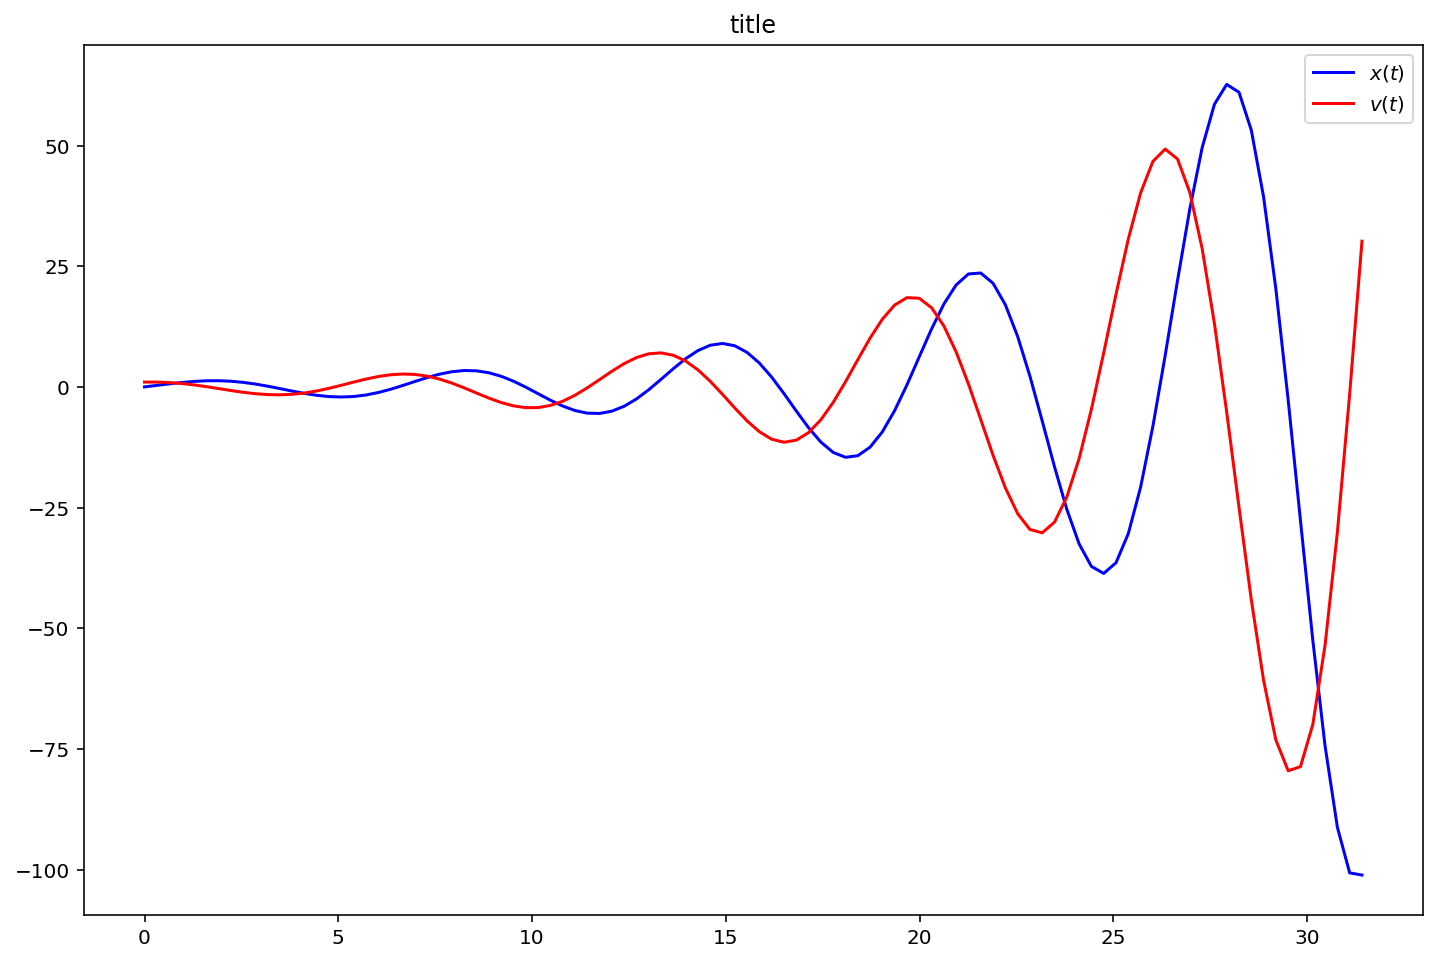

In [2]:
odes.eulermethod(0.0,5*2*np.pi,0.0,1.0, 100)

Euler's method with n=200

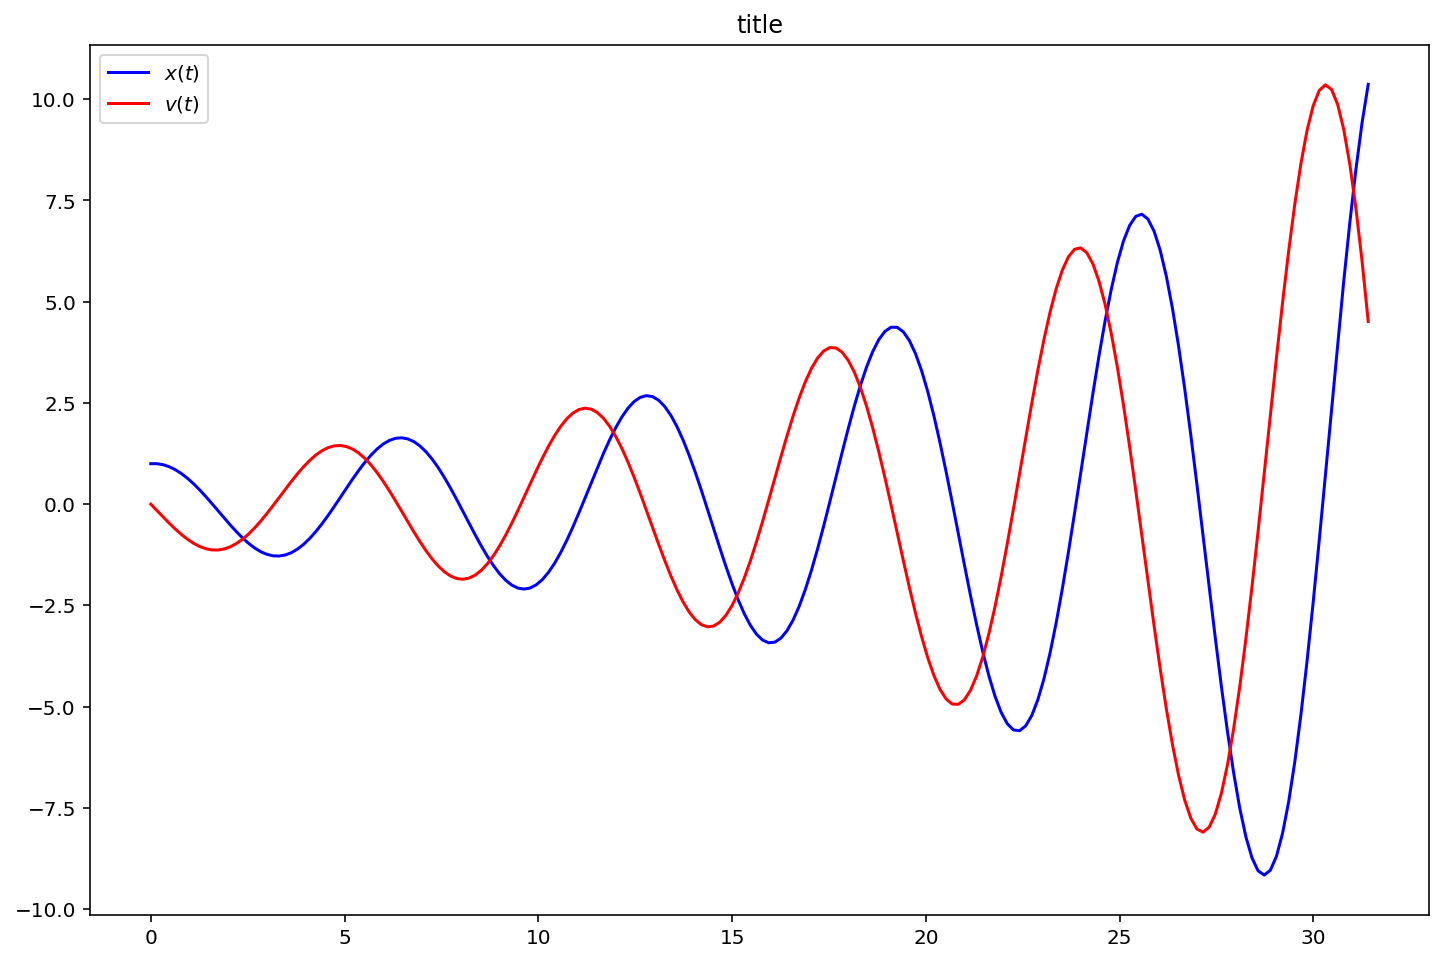

In [3]:
odes.eulermethod(0.0,10*np.pi,1.0,0.0,200)

Euler's method with n=4000

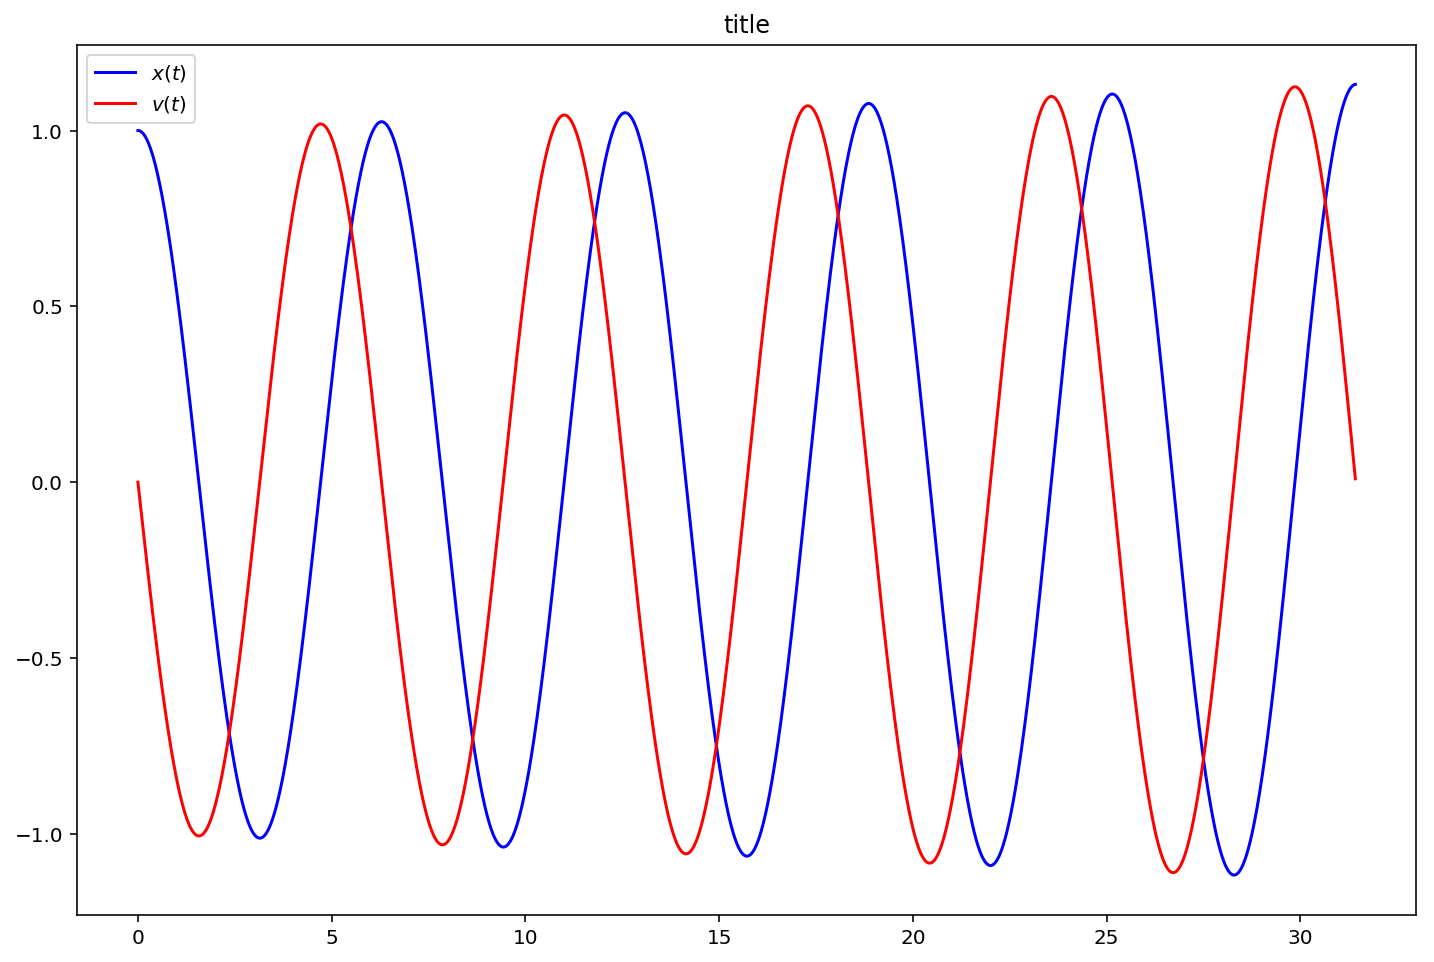

In [4]:
odes.eulermethod(0.0,10*np.pi,1.0,0.0,4000)

## The midpoint method
### Heun's method
$$ u_{k+1} = u_{k-1} + 2\Delta t f[u_k,t_k] $$
Is based on the same idea as the Euler's method, but does it a bit better

### Trapezoid method:

$$ u^*_{k+1} = u_k + \Delta t f[u_k,t_k] $$
$$ u_{k+1} = u_k + \frac{\Delta t}{2}(f[u_k,t_k] + f[u^*_{k+1},t_k])$$
This method averages the slope that is obtained using Euler's approximation with the slope obtained from evaluating the slope at the point given by Euler's approximation. This essentially is adding in some error correction to Euler's method by smoothing out the slope function that we obtain from Euler's method.

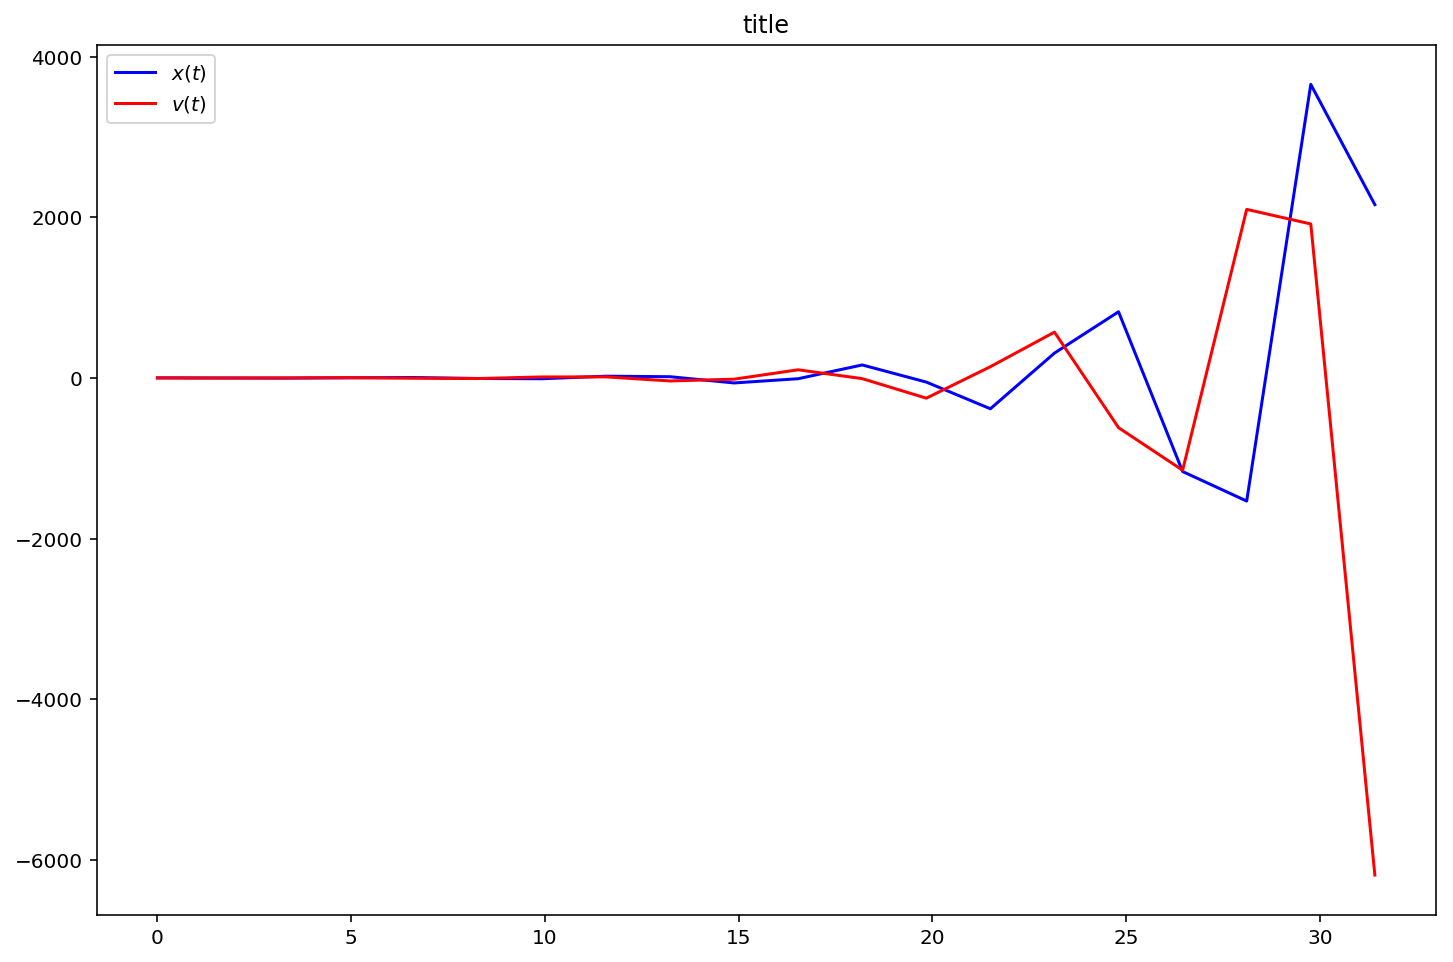

In [5]:
odes.heun(0.0,10*np.pi,1.0,0.0,20)

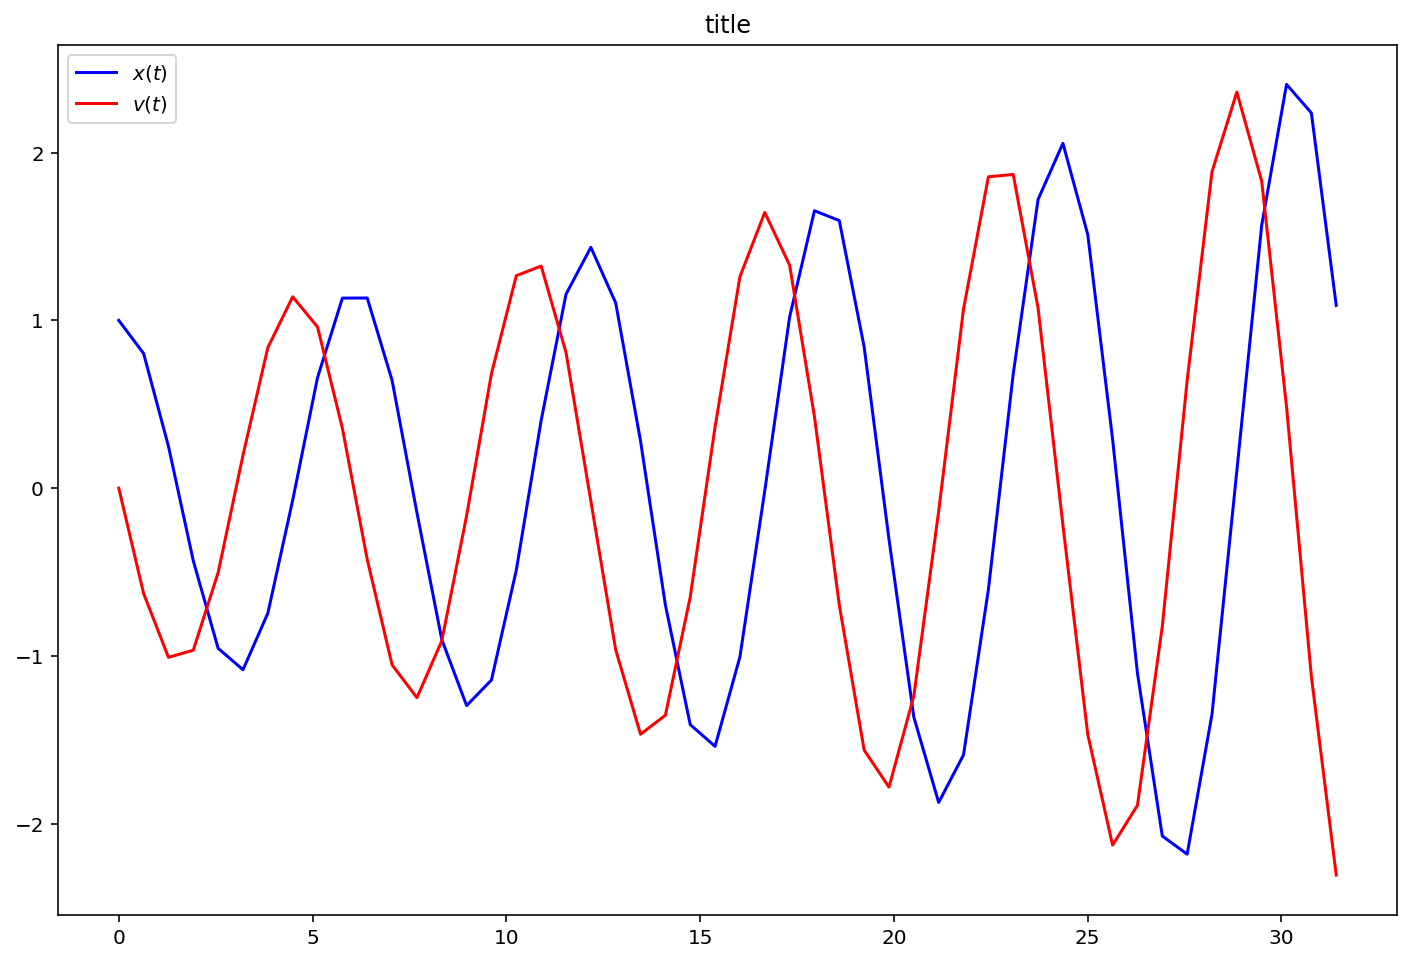

In [6]:
odes.heun(0.0,10*np.pi,1.0,0.0,50)

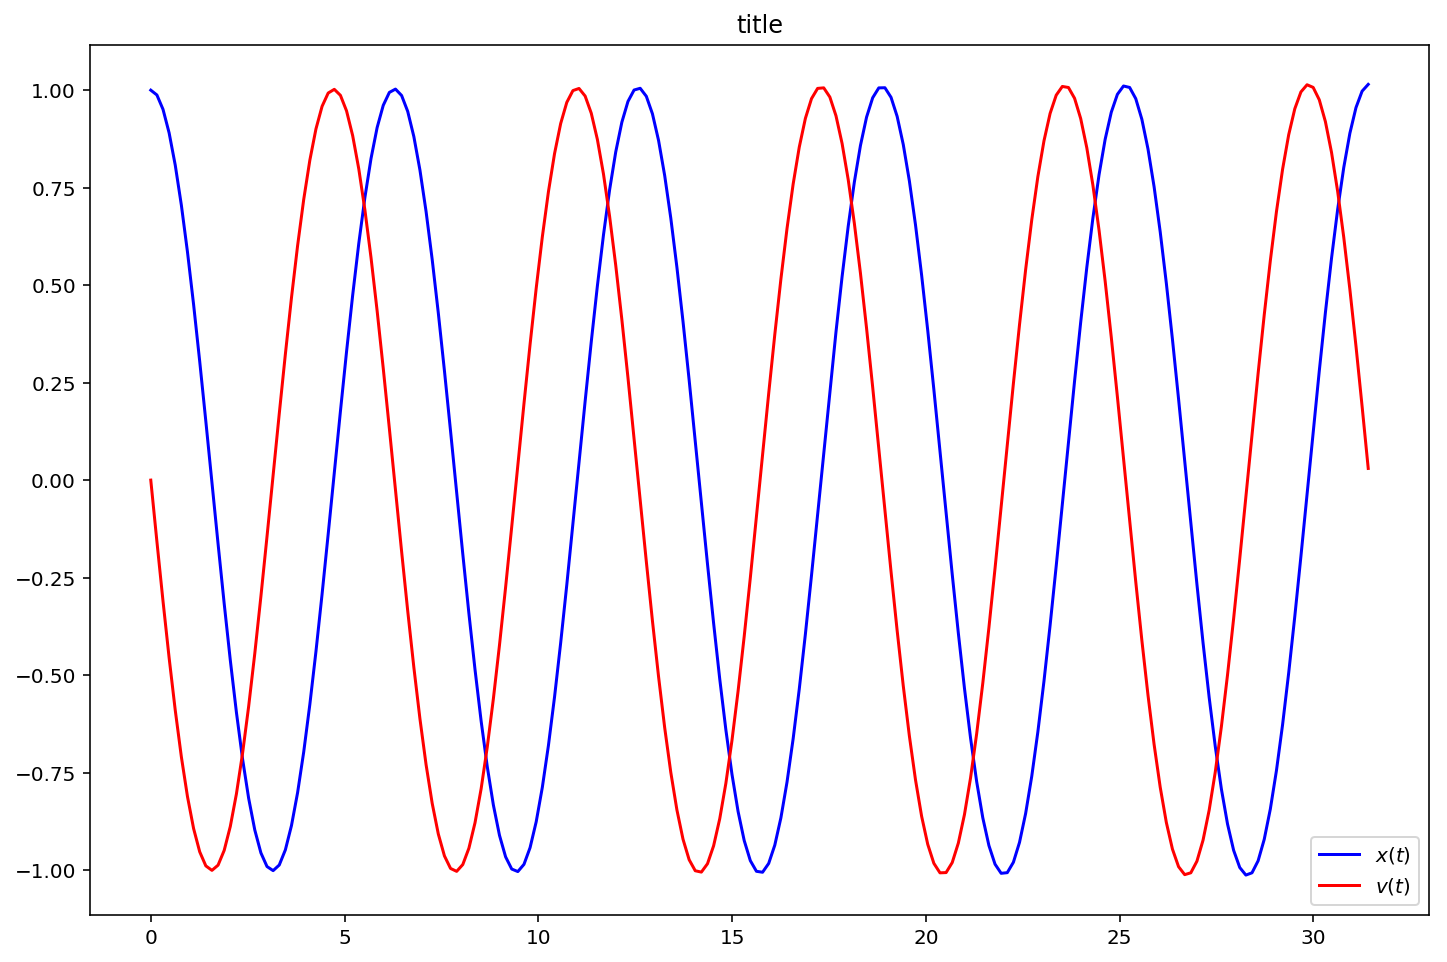

In [7]:
odes.heun(0.0,10*np.pi,1.0,0.0,200)

## The Runge-Kutta Methods

Are an algorithms used to approximate ode's. 

### The Runge-Kutta of order 2:

$$ u_{k+1} = u_k + K_2 $$
$$ K_1 = \Delta t\, f[t_k, u_k] $$ 
$$ K_2 = \Delta t\, f[t_k + \Delta t/2, u_k + K_1/2] $$

This method uses error correction to evaluate $u'(t)$. It uses the $K_1$ term to find a slight change in the derivative and then uses that to predict the change in the derivative in the future (in a sense.)

### The Runge-Kutta of order 4:

$$ u_{k+1} = u_k + (K_1 + 2K_2 + 2K_3 + K_4)/6 $$
$$ K_1 = \Delta t\,f[t_k,u_k] $$
$$ K_2 = \Delta t\, f[t_k + \Delta t/2, u_k + K_1/2] $$
$$ K_3 = \Delta t\, f[t_k + \Delta t/2, u_k + K_2/2] $$
$$ K_4 = \Delta t\,f[t_k + \Delta t, u_k + K_3] $$


The forth order approximation expands on this idea. It takes an average of all of the computed change terms and then weights them accordingly.

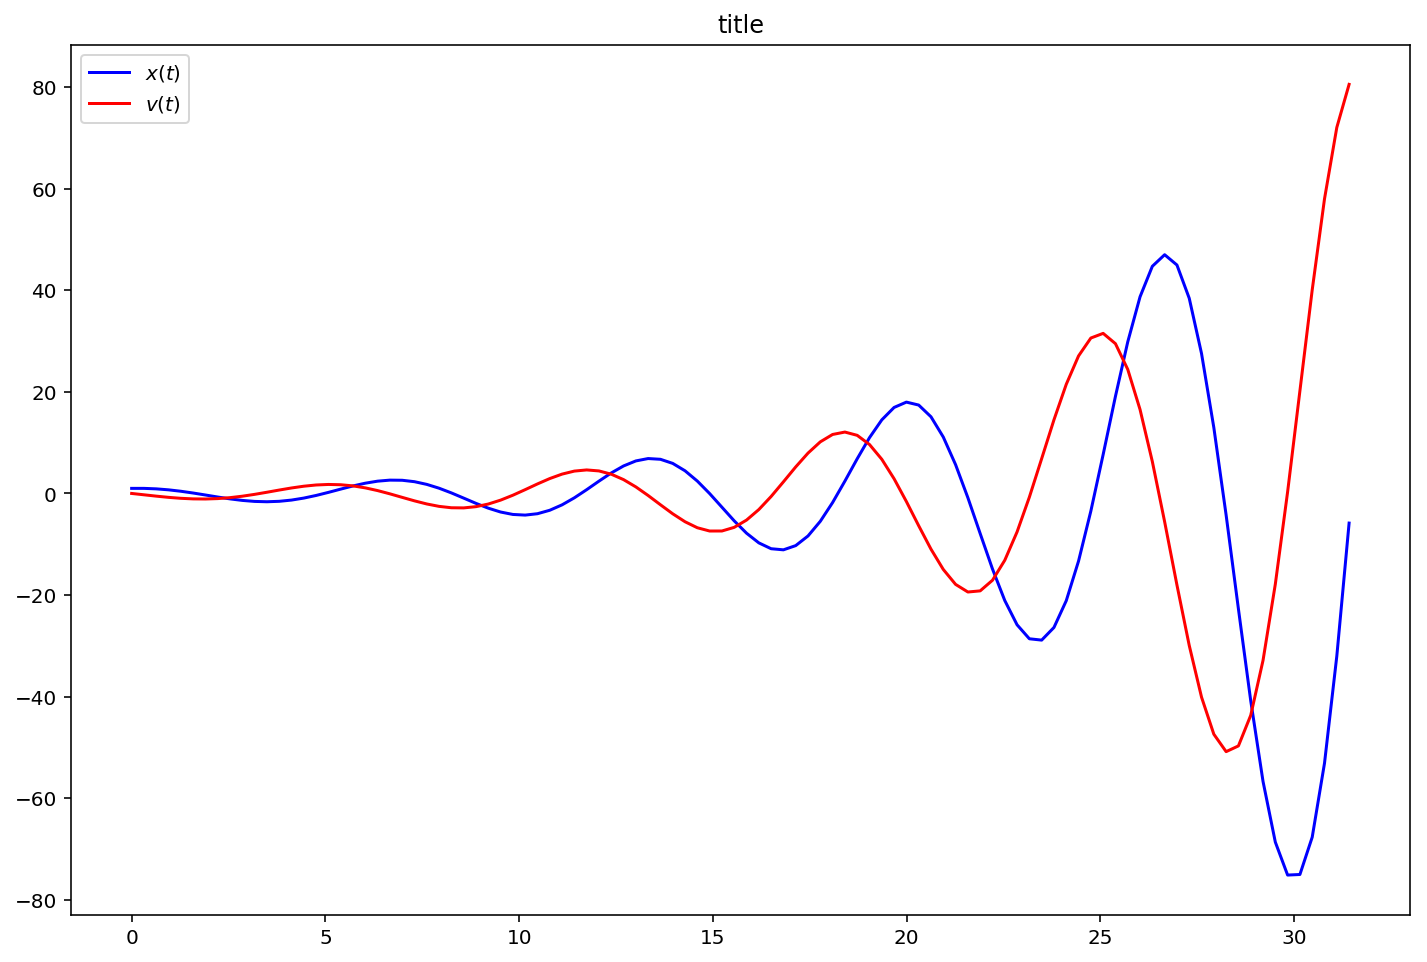

In [8]:
odes.rungekutta1(0.0,10*np.pi,1.0,0.0,100)

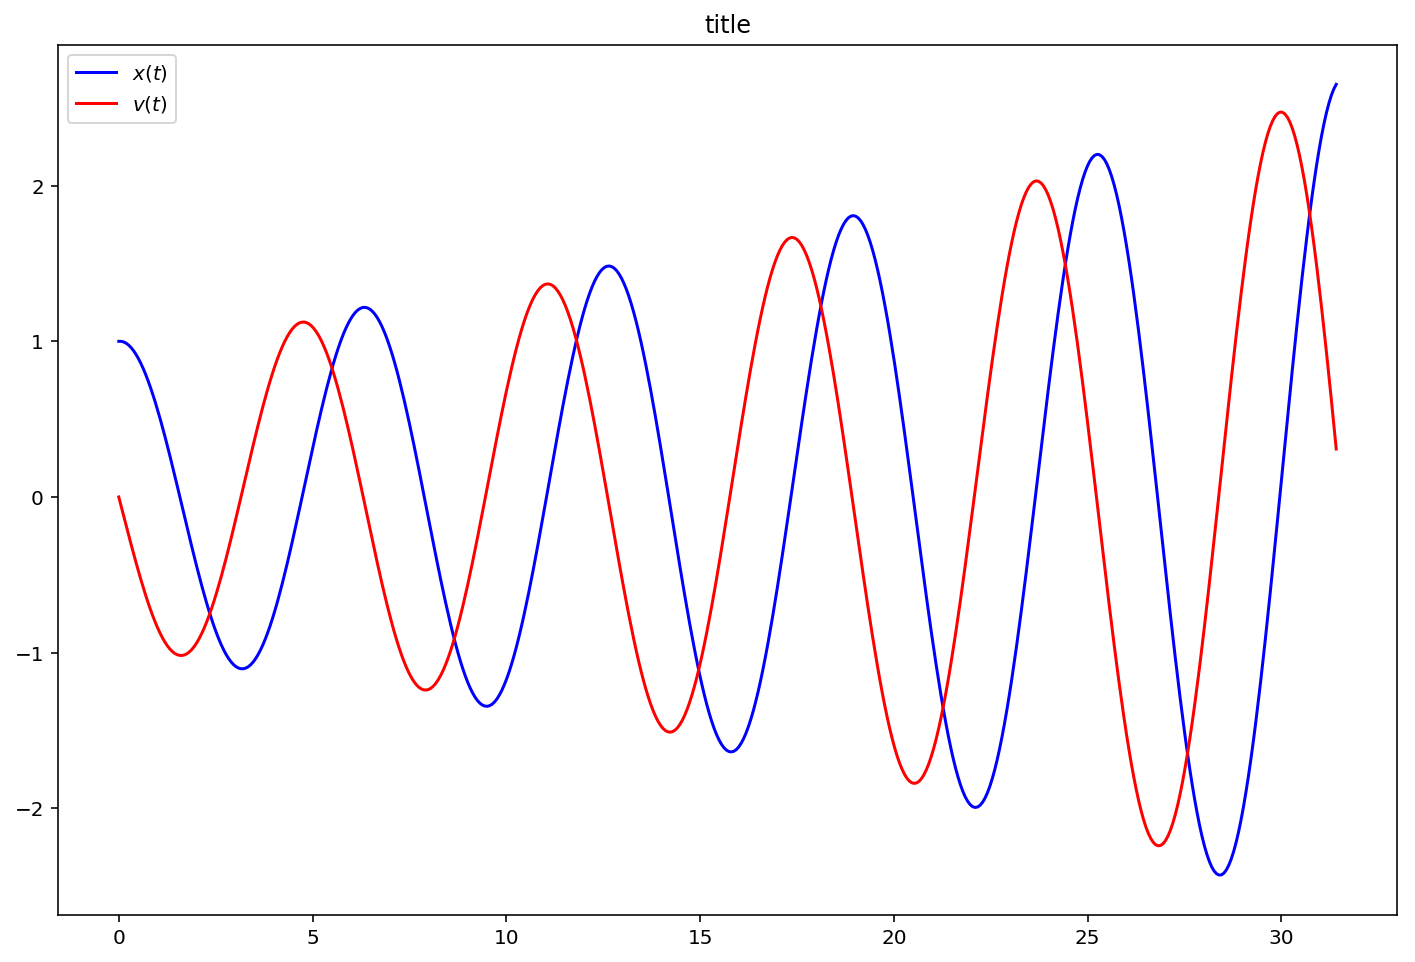

In [9]:
odes.rungekutta1(0.0,10*np.pi,1.0,0.0,500)

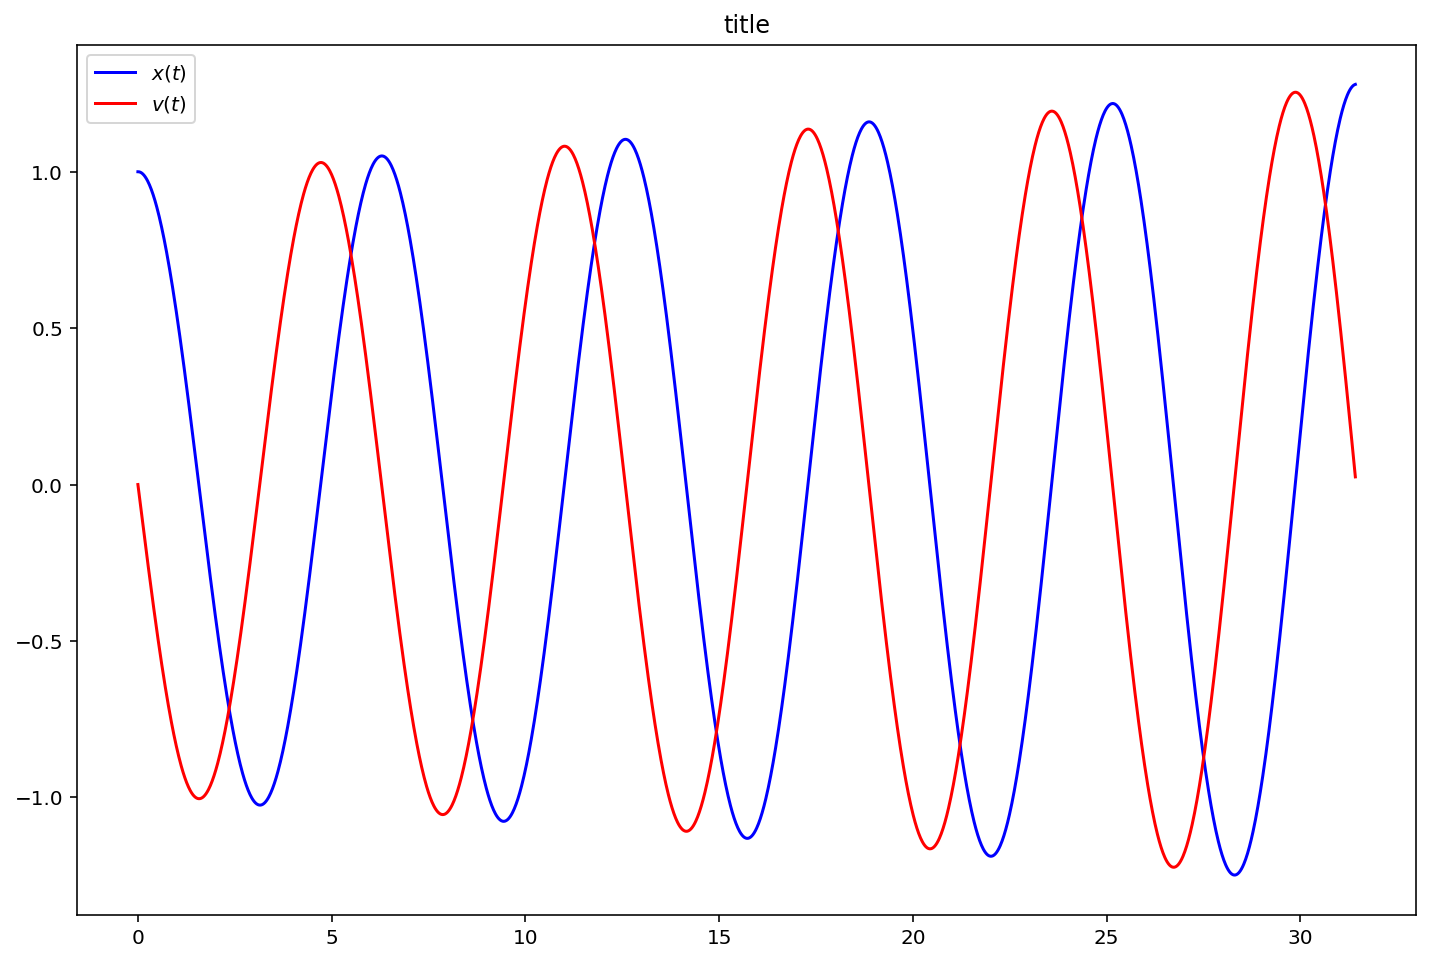

In [10]:
odes.rungekutta1(0.0,10*np.pi,1.0,0.0,2000)

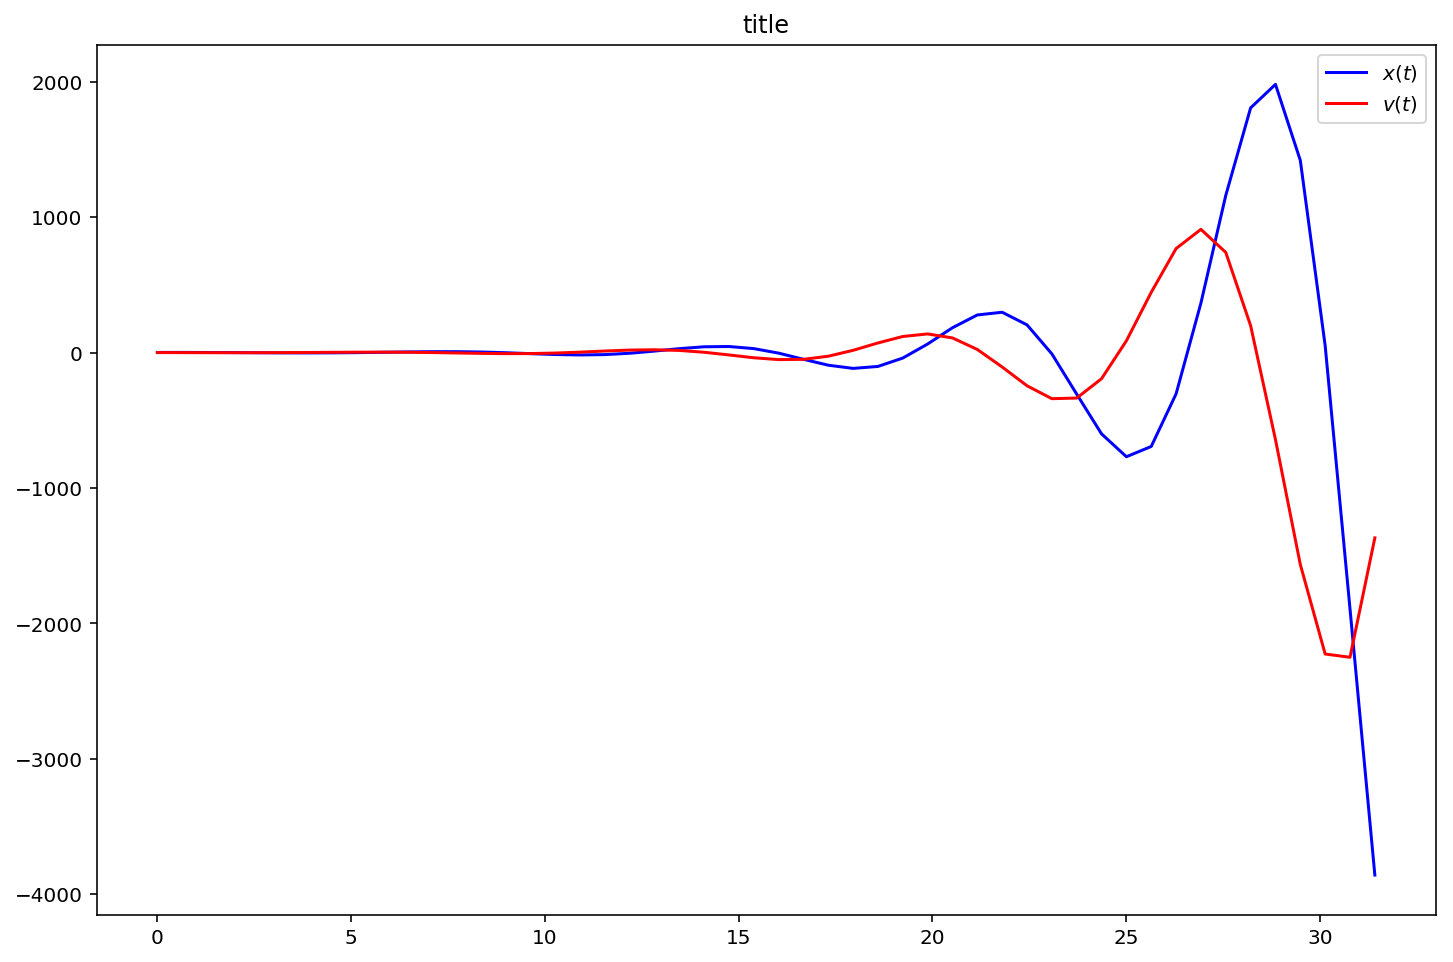

In [11]:
odes.runge2(0.0,10*np.pi,1.0,0.0,50)

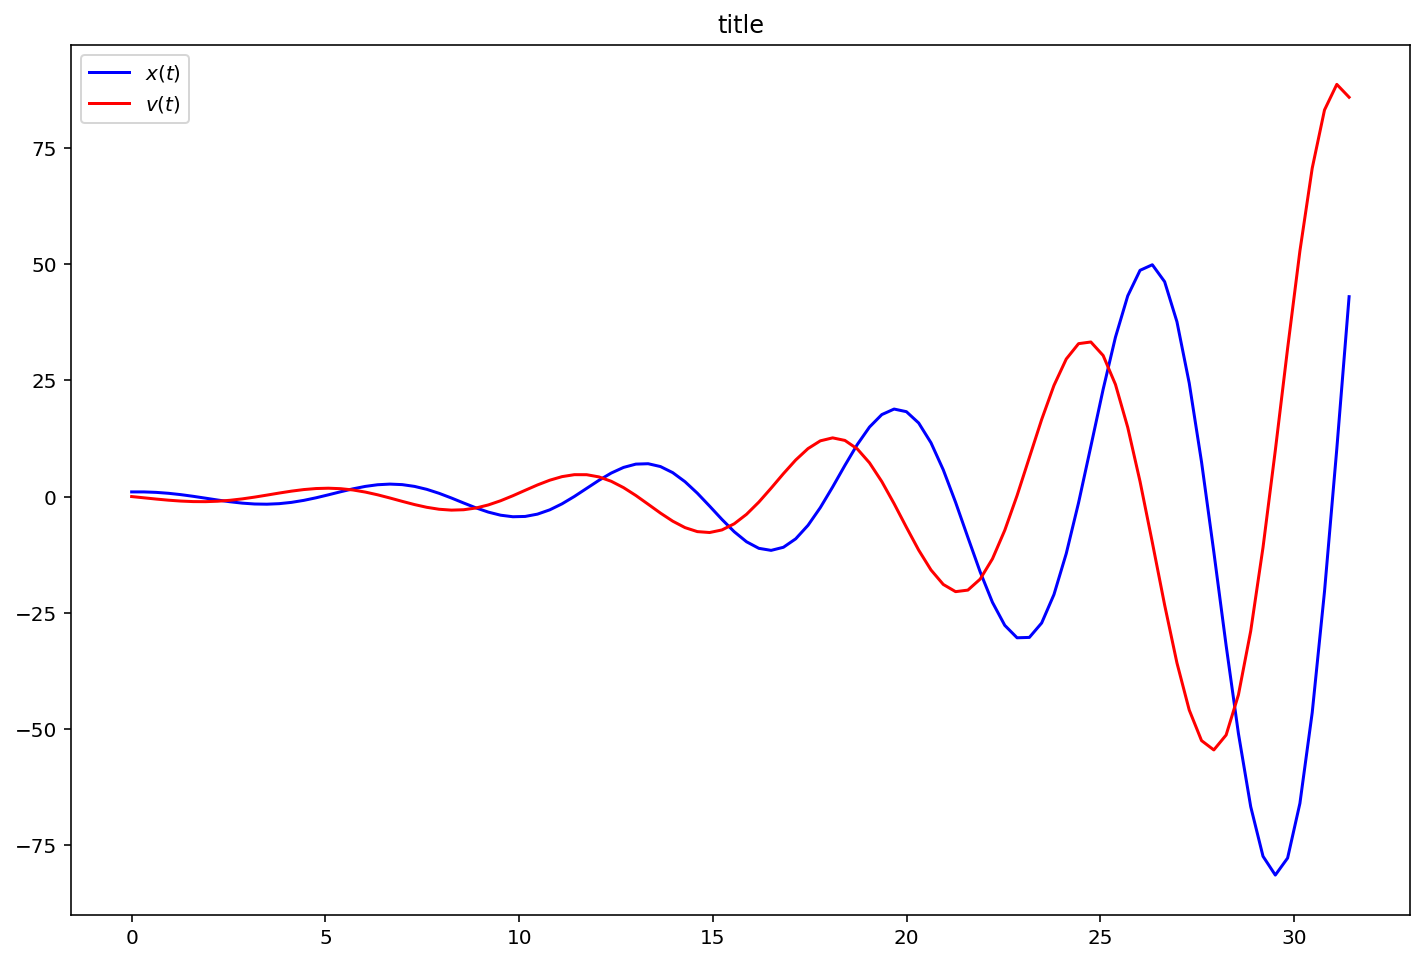

In [12]:
odes.runge2(0.0,10*np.pi,1.0,0.0,100)

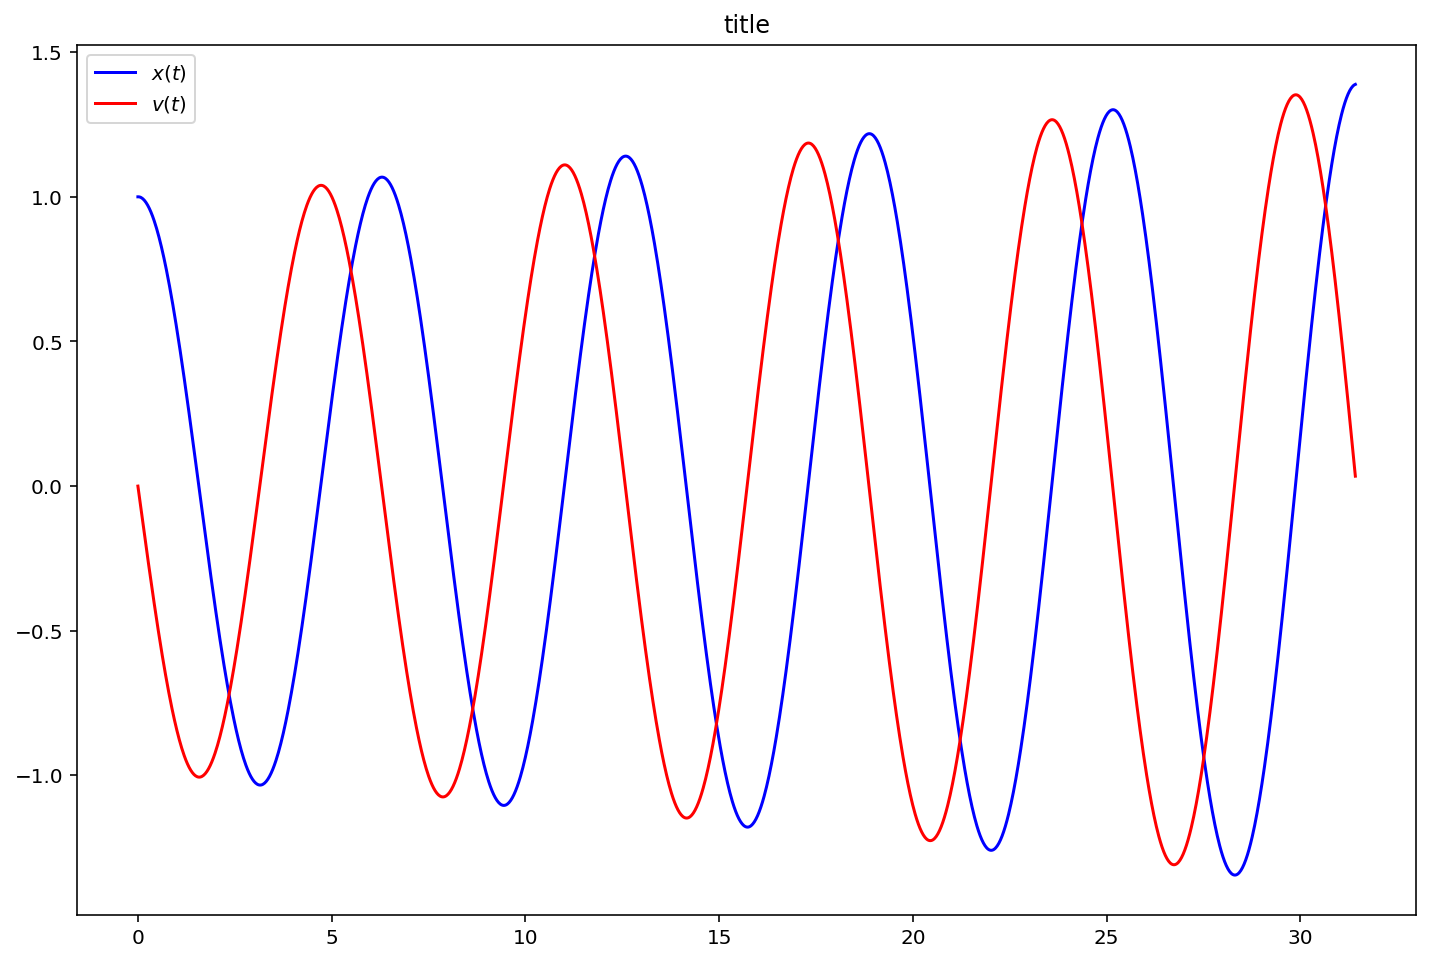

In [13]:
odes.runge2(0.0,10*np.pi,1.0,0.0,1500)

### Conclusion

As we see in each method, the larger the n the better the approximation, we also notice the the more "complicated" approximation, approximates the function better at low n's but as the n gets bigger the approximation becomes identical(up to some a small number)